## XOR 게이트 구현 

- 딥러닝(pytorch, tensorflow, keras 프레임워크)    

- 초기 생성


> input, label tensor 생성  
> model 생성  
> loss 생성  
> optimizer 생성  

- 훈련  
- 예측



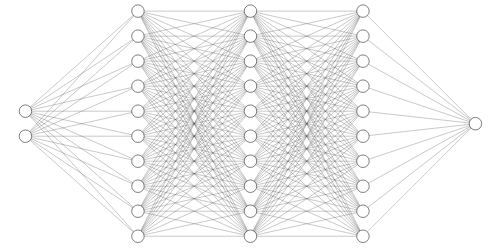

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 이건 밑의 iris 예제에서!

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# 변수 생성
''' 
    sklearn은 numpy를 입력값으로 받지만,
    pytorch에서는 tensor값을 받습니다
    pytorch는 자료형에 예민해서 주의하셔야 합니다! 
 '''

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
print(X[0])

tensor([0., 0.], device='cuda:0')


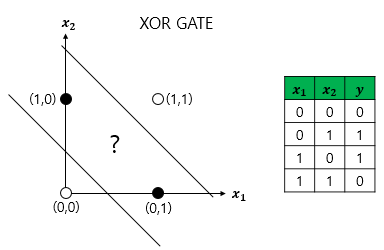

In [ ]:
#model 생성

model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer(feature의 갯수) = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1(label의 갯수)
          nn.Sigmoid()
          ).to(device)

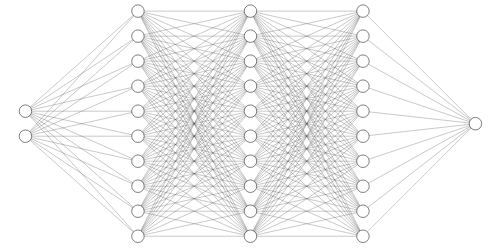

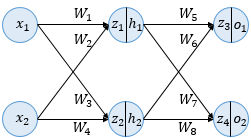

In [ ]:
criterion = torch.nn.BCELoss().to(device) # loss function 생성
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # 앞서 생성한 model의 parameter를 update 해주는 optimizer (다음 시간에 자세히)

In [ ]:
for epoch in range(10001):
    optimizer.zero_grad()                # 매 epoch마다 gradient를 초기화

    hypothesis = model(X)               # forward 연산

    cost = criterion(hypothesis, Y)     # loss 계산
    cost.backward()                     # 역전파
    optimizer.step()                    # parameter 업데이트 

    # 1000의 배수에 해당되는 epoch마다 loss를 출력
    if epoch % 1000 == 0:
        print(epoch, cost.item())

0 0.00014644474140368402
1000 0.00012173521099612117
2000 0.00010400077735539526
3000 9.063308971235529e-05
4000 8.023116242839023e-05
5000 7.193056808318943e-05
6000 6.510535604320467e-05
7000 5.9502159274416044e-05
8000 5.473350756801665e-05
9000 5.065036748419516e-05
10000 4.7118614020291716e-05


In [ ]:
with torch.no_grad():                        # gradient를 사용하지 않겠다
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.11702066e-04]
 [9.99828815e-01]
 [9.99842286e-01]
 [1.85309298e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


## 실제 데이터 셋에 접목 : iris dataset 분류 

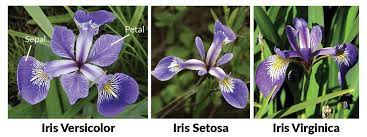

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris

In [ ]:
# 연산 방법 
'''
    cpu: 복잡한 일 + 느림
    gpu: 단순한 일 + 빠름
    pytorch를 이용해서 gpu 연산이 가능해짐
    colab에서 무료로 gpu 제공!

    단, gpu 연산 시,
    계산에 필요한 모든 variable/함수를 .to(device)를 이용해 gpu로 옮겨놔야 한다! 
'''

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

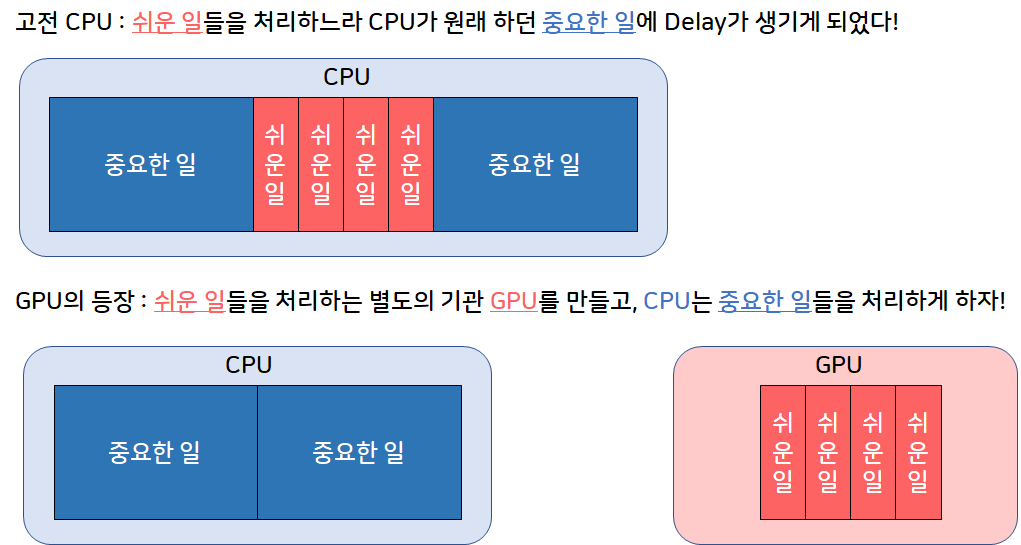

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
from torch.utils.data import  TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()

input = iris.data
output = iris.target

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.33, random_state=42,stratify=iris.target,shuffle = True)

# 데이터를 tensor로 바꿔주고 gpu 연산이 가능해지도록 gpu에 옮김
# label 값을 왜 long 에 옮겨놓는가? loss function이 다르기 때문 => 공식 사이트 자주 확인하기ㅠㅠ 
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

In [ ]:
print(X_train[0])
print(y_train[0])

tensor([6.3000, 3.4000, 5.6000, 2.4000], device='cuda:0')
tensor(2, device='cuda:0')


input 변수가 4개!  
y의 class 종류가 3개!

In [ ]:
 model = nn.Sequential(
          nn.Linear(4, 50, bias=True), # input_layer = 2, hidden_layer1 = 10 
          nn.Sigmoid(),
          nn.Linear(50, 50, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(50, 3, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Softmax()
          ).to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss().to(deivce)
optimizer = optim.SGD(model.parameters(), lr=1)

In [ ]:
losses = []
for epoch in range(100):

    optimizer.zero_grad()
    # forward 연산
    hypothesis = model(X_train)

    # 비용 함수
    cost = criterion(hypothesis, y_train)
    cost.backward()
    optimizer.step()
    losses.append(cost.item()) # 값만 가져오기 위해서 .item()

    # 10의 배수에 해당되는 에포크마다 비용을 출력
    if epoch % 10 == 0:
        print(epoch, cost.item())

0 1.1006108522415161
10 1.0937182903289795
20 1.0865504741668701
30 1.0728110074996948
40 1.0407882928848267
50 0.9731807708740234
60 0.8953731656074524
70 0.8446670770645142
80 0.8107601404190063
90 0.7812734842300415


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


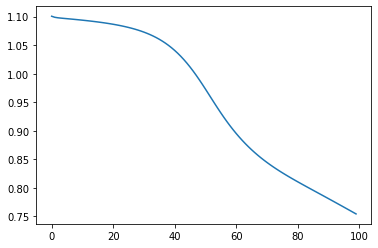

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [ ]:
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    y_pred = y_pred.detach().numpy() # tensor를 numpy로 바꿈
    predicted = np.argmax(y_pred,axis=1)
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.01285098 0.40227005 0.58487904]
argmax를 한 후의 output은 2
accuracy는 0.98


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


## 다음주 과제 

 - dataset을 임의로 선정해서 직접 분석 해보기(제공한 코드를 활용해서 해보기 ex 모델의 hidden layer/neuron 수를 바꾸거나, lr를 바꾸거나, 전처리 등)   
 - iris 데이터 셋을 사용하여도 좋습니다




 - 변경하면 안 되는 것 : 안 배운 것들!  ( ex optimizer, activation function, batch size )
 - 비추 : 안 배운 것들 ! ( ex dataloader, datset)



---



 - 형식/ 제출 방식

  제출은 github에 다음주 화 - 수요일까지 해주세요!   
https://github.com/KU-BIG/KUBIG_2022_Spring/tree/main/%EB%B0%A9%ED%95%99%EB%B6%84%EB%B0%98/DL/2%EC%A3%BC%EC%B0%A8 
  2주차 폴더 안에! 2주차_ 혜림 


> (필수) 데이터 분석 목표, auc, 기존 코드에서 바꿔본 내용(upload할 때 description에 달아주세요) +  코드 (옵션)질문사항



---

- 발표

 제출된 것들 중   
  (1) auc가 높은 것   
  (2) 흥미로운 시도  
기준으로 3 건을 뽑아서 발표하도록 하겠습니다!  모두가 업로드 한 시점으로부터 최대한 빠르게 발표할 사람을 알려드리도록 할께요!   
발표는 위에서 필수 사항 + 코드 로 중심으로 간단하게 해주시면 됩니다 기타 발표 자료는 추가 사항입니다 



하다가 질문 생기면 편하게 말씀해주세요~  



